# Formatando dados do Spotify Charts para construção do Bar Chart Race
por Mateus Cichelero da Silva

O objetivo dessa análise é construirmos uma visualização animada do tipo Bar Chart Race com as músicas mais tocadas do Spotify. Para tal, seguiremos os seguintes passos:
- Obtenção dos dados: O Spotify disponibiliza as estatísticas das músicas mais tocadas no site https://spotifycharts.com/. Para realizar a requisição dessas informações, utilizaremos o código disponibilizado em https://github.com/fbkarsdorp/spotify-chart 
- Formatação do dataset: A animação será gerada através do web app https://flourish.studio. Para que possamos utilizar o template do app, deveremos formatar os dados em linhas e colunas específicas. Após isso, basta salvar o dataset como .csv e faer o upload no site.

O resultado final pode ser conferido em https://public.flourish.studio/visualisation/804288/

In [1]:
import spotify_ranking as sr
import io
import pandas as pd
import requests
import time
import tqdm
import numpy as np

Utilizaremos a função get_charts para realizar a requisição dos rankings semanais do spotify, do começo de 2017 até o outubro de 2019:  

In [2]:
chart = sr.get_charts('2017-01-01', '2019-10-10', freq='weekly', region='global')
chart.head()

 14%|█████████▎                                                      | 21/145 [01:00<06:15,  3.03s/it]

 15%|█████████▋                                                      | 22/145 [01:01<05:15,  2.57s/it]

100%|███████████████████████████████████████████████████████████████| 145/145 [07:11<00:00,  2.90s/it]


,Position,Track Name,Artist,Streams,URL,date
0,1,Starboy,The Weeknd,25734078,https://open.spotify.com/track/5aAx2yezTd8zXrk...,2017-01-01
1,2,Closer,The Chainsmokers,23519705,https://open.spotify.com/track/7BKLCZ1jbUBVqRi...,2017-01-01
2,3,Rockabye (feat. Sean Paul & Anne-Marie),Clean Bandit,21216399,https://open.spotify.com/track/5knuzwU65gJK7IF...,2017-01-01
3,4,Let Me Love You,DJ Snake,19852704,https://open.spotify.com/track/4pdPtRcBmOSQDlJ...,2017-01-01
4,5,I Don’t Wanna Live Forever (Fifty Shades Darke...,ZAYN,18316326,https://open.spotify.com/track/3NdDpSvN911VPGi...,2017-01-01


Conferindo o formato do nosso dataframe, podemos verificar que temos informações sobre 28600 colocações (200 por semana) com seus atributos distribuídos em seis colunas, como data, artista, número de vezes que foram tocadas, etc

In [3]:
chart.shape

(28600, 6)

In [4]:
# Última música da lista - 200° da data mais recente requisitada
chart.iloc[-1]

Position                                                    200
Track Name                                          Honda Civic
Artist                                               The Cratez
Streams                                                 4467147
URL           https://open.spotify.com/track/0WFgtxiLNr99Yao...
date                                        2019-10-06 00:00:00
Name: 199, dtype: object

In [5]:
chart.to_csv('data/ranking_semanal.csv', index=False)

In [5]:
ranking = pd.read_csv('data/ranking_semanal.csv')

In [6]:
ranking.head()

,Position,Track Name,Artist,Streams,URL,date
0,1,Starboy,The Weeknd,25734078,https://open.spotify.com/track/5aAx2yezTd8zXrk...,2017-01-01
1,2,Closer,The Chainsmokers,23519705,https://open.spotify.com/track/7BKLCZ1jbUBVqRi...,2017-01-01
2,3,Rockabye (feat. Sean Paul & Anne-Marie),Clean Bandit,21216399,https://open.spotify.com/track/5knuzwU65gJK7IF...,2017-01-01
3,4,Let Me Love You,DJ Snake,19852704,https://open.spotify.com/track/4pdPtRcBmOSQDlJ...,2017-01-01
4,5,I Don’t Wanna Live Forever (Fifty Shades Darke...,ZAYN,18316326,https://open.spotify.com/track/3NdDpSvN911VPGi...,2017-01-01


Para facilitar posteriormente na visualização do gráfico, iremos criar uma nova coluna 'song' que une o nome da música e seu artista:

In [7]:
ranking['song'] = ranking['Track Name'] + ' - ' + ranking['Artist']

In [8]:
ranking.head(3)

,Position,Track Name,Artist,Streams,URL,date,song
0,1,Starboy,The Weeknd,25734078,https://open.spotify.com/track/5aAx2yezTd8zXrk...,2017-01-01,Starboy - The Weeknd
1,2,Closer,The Chainsmokers,23519705,https://open.spotify.com/track/7BKLCZ1jbUBVqRi...,2017-01-01,Closer - The Chainsmokers
2,3,Rockabye (feat. Sean Paul & Anne-Marie),Clean Bandit,21216399,https://open.spotify.com/track/5knuzwU65gJK7IF...,2017-01-01,Rockabye (feat. Sean Paul & Anne-Marie) - Clea...


O formato exigido pelo site se assemelha a tabela abaixo, onde cada coluna deve representar uma data e as linhas os 'atletas' que disputam a corrida - as músicas, em nosso caso. As células representarão nosso critério de decisão: o número de vezes que foram tocadas na plataforma.
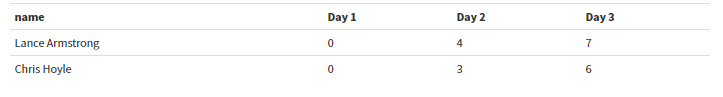

Assim, devemos selecionar os valores únicos de datas para formação das colunas da tabela final: 

In [9]:
dates = ranking['date'].value_counts()

In [10]:
dates = list(dates.index)

In [11]:
dates.sort()

In [12]:
dates

['2017-01-01',
 '2017-01-08',
 '2017-01-15',
 '2017-01-22',
 '2017-01-29',
 '2017-02-05',
 '2017-02-12',
 '2017-02-19',
 '2017-02-26',
 '2017-03-05',
 '2017-03-12',
 '2017-03-19',
 '2017-03-26',
 '2017-04-02',
 '2017-04-09',
 '2017-04-16',
 '2017-04-23',
 '2017-04-30',
 '2017-05-07',
 '2017-05-14',
 '2017-05-21',
 '2017-06-11',
 '2017-06-18',
 '2017-06-25',
 '2017-07-02',
 '2017-07-09',
 '2017-07-16',
 '2017-07-23',
 '2017-07-30',
 '2017-08-06',
 '2017-08-13',
 '2017-08-20',
 '2017-08-27',
 '2017-09-03',
 '2017-09-10',
 '2017-09-17',
 '2017-09-24',
 '2017-10-01',
 '2017-10-08',
 '2017-10-15',
 '2017-10-22',
 '2017-10-29',
 '2017-11-05',
 '2017-11-12',
 '2017-11-19',
 '2017-11-26',
 '2017-12-03',
 '2017-12-10',
 '2017-12-17',
 '2017-12-24',
 '2017-12-31',
 '2018-01-07',
 '2018-01-14',
 '2018-01-21',
 '2018-01-28',
 '2018-02-04',
 '2018-02-11',
 '2018-02-18',
 '2018-02-25',
 '2018-03-04',
 '2018-03-11',
 '2018-03-18',
 '2018-03-25',
 '2018-04-01',
 '2018-04-08',
 '2018-04-15',
 '2018-04-

Faremos o mesmo processo com as músicas para formação dos índices das linhas:

In [13]:
songs = ranking['song'].value_counts()

In [14]:
songs = list(songs.index)

In [15]:
len(songs)

2409

In [16]:
songs

["Say You Won't Let Go - James Arthur",
 'Shape of You - Ed Sheeran',
 'Closer - The Chainsmokers',
 'Believer - Imagine Dragons',
 'Perfect - Ed Sheeran',
 'Photograph - Ed Sheeran',
 'Thunder - Imagine Dragons',
 'Congratulations - Post Malone',
 'I Like Me Better - Lauv',
 'Thinking out Loud - Ed Sheeran',
 'Something Just Like This - The Chainsmokers',
 'goosebumps - Travis Scott',
 'Jocelyn Flores - XXXTENTACION',
 'New Rules - Dua Lipa',
 'Too Good At Goodbyes - Sam Smith',
 'HUMBLE. - Kendrick Lamar',
 "God's Plan - Drake",
 'Happier - Ed Sheeran',
 'Wonderwall - Remastered - Oasis',
 'One Dance - Drake',
 'XO Tour Llif3 - Lil Uzi Vert',
 'Havana (feat. Young Thug) - Camila Cabello',
 'Meant to Be (feat. Florida Georgia Line) - Bebe Rexha',
 'I Fall Apart - Post Malone',
 'SAD! - XXXTENTACION',
 'Moonlight - XXXTENTACION',
 'The Middle - Zedd',
 'Fuck Love (feat. Trippie Redd) - XXXTENTACION',
 'Psycho (feat. Ty Dolla $ign) - Post Malone',
 'Youngblood - 5 Seconds of Summer',
 '

Criaremos agora o esqueleto da tabela final, preenchendo o nome das linhas e colunas, mas deixando as células com valor 0. 

In [17]:
df_final = pd.DataFrame(0, index=np.arange(len(songs)), columns=dates)

In [18]:
df_final.head()

,2017-01-01,2017-01-08,2017-01-15,2017-01-22,2017-01-29,2017-02-05,2017-02-12,2017-02-19,2017-02-26,2017-03-05,...,2019-08-04,2019-08-11,2019-08-18,2019-08-25,2019-09-01,2019-09-08,2019-09-15,2019-09-22,2019-09-29,2019-10-06
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
df_final.index = songs

In [20]:
df_final.head()

,2017-01-01,2017-01-08,2017-01-15,2017-01-22,2017-01-29,2017-02-05,2017-02-12,2017-02-19,2017-02-26,2017-03-05,...,2019-08-04,2019-08-11,2019-08-18,2019-08-25,2019-09-01,2019-09-08,2019-09-15,2019-09-22,2019-09-29,2019-10-06
Say You Won't Let Go - James Arthur,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Shape of You - Ed Sheeran,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Closer - The Chainsmokers,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Believer - Imagine Dragons,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Perfect - Ed Sheeran,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


As celulas serão preenchidas com os valores de 'Stream':

In [ ]:
for data in dates:
    for som in songs:
        times_played = ranking['Streams'].loc[(ranking['song'] == som) & (ranking['date'] == data)]
        if times_played.shape == (1,):
            df_final.loc[som, data] = np.asscalar(times_played.values)

In [ ]:
df_final.insert(0, 'song', songs)

In [ ]:
df_final.head()

In [ ]:
df_final.to_csv('data/ranking_semanal_final.csv', index=False)